In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import struct
N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr

In [3]:
df = pd.read_csv("Data/координаты_дорог_ВАП.txt", sep="\t", names=['index', 'i', 'j', 'id_road'])
number_road = np.sort(df['id_road'].unique())
# длина дороги
road_len = [df[df['id_road'] == i]['id_road'].count() for i in number_road]
# координаты дороги
i_coordinate_road = pd.Series([i for i in df[df['id_road']==k]['i']] for k in number_road)
j_coordinate_road = pd.Series([j for j in df[df['id_road']==k]['j']] for k in number_road)
d = {'id_road' : number_road, 'i_coordinate' : i_coordinate_road, 'j_coordinate' : j_coordinate_road, 'len_road' : road_len}
ds = pd.DataFrame(d)
ds.head()

,id_road,i_coordinate,j_coordinate,len_road
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33


In [4]:
ds['I'] = pd.Series([i for i in df[df['id_road']==k]['i']] for k in number_road)
ds['J'] = pd.Series([j for j in df[df['id_road']==k]['j']] for k in number_road)

In [5]:
ds['x'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['y'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['x_last'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['y_last'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['xy_last'] = [(int(ds[ds['id_road'] == j]['x_last']), int(ds[ds['id_road'] == j]['y_last'])) \
    for j in ds['id_road'].unique()]
ds.head()
ds['xy'] = [(int(ds[ds['id_road'] == j]['x']), int(ds[ds['id_road'] == j]['y'])) \
    for j in ds['id_road'].unique()]
# координаты дороги
# coordinate_road = pd.Series([(i, j) for i, j in zip(df[df['id_road']==k]['i'], df[df['id_road']==k]['j'])] \
#     for k in number_road)
# ds['coordinate'] = coordinate_road
coordinate_road = pd.Series([(i, j) for i, j in zip(ds[ds['id_road']==k]['i_coordinate'].values[0], ds[ds['id_road']==k]['j_coordinate'].values[0])] \
    for k in number_road)
ds['coordinate'] = coordinate_road

In [6]:
# разрывы в дорогах 6 ячеек, 3 ячейки
def new_coord(i, coordi, coordj, flag):
    ki = ds[ds['id_road']==i][coordi].values[0][flag]
    kj = ds[ds['id_road']==i][coordj].values[0][flag]
    e = 6
    if flag == 0:
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki + j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki - j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj - j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki - j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki + j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj - j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki + j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj+j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki - j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj-j)
    else:
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki + j)
            ds[ds['id_road']==i][coordj].values[0].append(kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki - j)
            ds[ds['id_road']==i][coordj].values[0].append(kj - j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki - j)
            ds[ds['id_road']==i][coordj].values[0].append(kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki + j)
            ds[ds['id_road']==i][coordj].values[0].append(kj - j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki + j)
            ds[ds['id_road']==i][coordj].values[0].append(kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki)
            ds[ds['id_road']==i][coordj].values[0].append(kj+j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki - j)
            ds[ds['id_road']==i][coordj].values[0].append(kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki)
            ds[ds['id_road']==i][coordj].values[0].append(kj-j)

In [7]:
for i in number_road:
    new_coord(i, 'i_coordinate', 'j_coordinate', -1)
    new_coord(i, 'i_coordinate', 'j_coordinate', 0)

In [8]:
ds['x'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['y'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['x_last'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['y_last'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['xy_last'] = [(int(ds[ds['id_road'] == j]['x_last']), int(ds[ds['id_road'] == j]['y_last'])) \
    for j in ds['id_road'].unique()]
ds.head()
ds['xy'] = [(int(ds[ds['id_road'] == j]['x']), int(ds[ds['id_road'] == j]['y'])) \
    for j in ds['id_road'].unique()]
# координаты дороги
# coordinate_road = pd.Series([(i, j) for i, j in zip(df[df['id_road']==k]['i'], df[df['id_road']==k]['j'])] \
#     for k in number_road)
# ds['coordinate'] = coordinate_road
coordinate_road = pd.Series([(i, j) for i, j in zip(ds[ds['id_road']==k]['i_coordinate'].values[0], ds[ds['id_road']==k]['j_coordinate'].values[0])] \
    for k in number_road)
ds['coordinate'] = coordinate_road

In [9]:
# Поиск соседей
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values:
        if(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)

In [10]:
[i for i in ds['id_road'].values if len(ds[ds['id_road']==i]['neighbours'].values[0]) == 0]

[]

In [11]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['time_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['time_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['dist'] = [{} for i in range(ds['id_road'].values.size)]

for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        n1 = dist1+1-24
        n2 = dist2+1-24
        if n1 < 0:
            n1 = 0
        if n2 < 0:
            n2 = 0
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(len(ds[ds['id_road']==j]['I'].values[0][:n1]) + len(ds[ds['id_road']==i]['I'].values[0][:n2]))

        ds[ds['id_road']==j]['dist'].values[0][str(i)]=n1

        ds[ds['id_road']==j]['time_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1]))
        ds[ds['id_road']==j]['time_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1]))
    
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1] + ds[ds['id_road']==i]['I'].values[0][:n2]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1] + ds[ds['id_road']==i]['J'].values[0][:n2]))

In [12]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,...,coordinate,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
0,1,"[676, 676, 676, 674, 675, 676, 676, 676, 676, ...","[196, 197, 198, 198, 198, 198, 200, 199, 198, ...",110,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",196,676,266,657,...,"[(676, 196), (676, 197), (676, 198), (674, 198...","[2, 14, 15, 16, 32]","[110, 49, 0, 109, 244]","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': 110, '14': 19, '15': 0, '16': 109, '32':..."
1,2,"[657, 657, 657, 655, 656, 657, 657, 657, 657, ...","[266, 267, 268, 268, 268, 268, 270, 269, 268, ...",44,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",266,657,277,644,...,"[(657, 266), (657, 267), (657, 268), (655, 268...","[1, 3, 16, 32, 33, 73]","[110, 44, 0, 134, 44, 44]","{'1': [676, 675, 675, 674, 674, 674, 673, 673,...","{'1': [198, 198, 199, 199, 200, 201, 202, 203,...","{'1': [], '3': [657, 656, 656, 655, 655, 654, ...","{'1': [], '3': [268, 268, 269, 269, 269, 269, ...","{'1': [], '3': [644, 644, 644, 644, 644, 644, ...","{'1': [], '3': [280, 279, 280, 281, 282, 283, ...","{'1': 0, '3': 55, '16': 0, '32': 0, '33': 55, ..."
2,3,"[644, 644, 644, 642, 643, 644, 644, 644, 644, ...","[278, 279, 280, 280, 280, 280, 282, 281, 280, ...",35,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",278,644,307,645,...,"[(644, 278), (644, 279), (644, 280), (642, 280...","[2, 4, 33, 34, 73, 95]","[44, 35, 0, 82, 0, 78]","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': [], '4': [644, 644, 644, 644, 644, 644, ...","{'2': [], '4': [280, 279, 280, 281, 282, 283, ...","{'2': [], '4': [645, 645, 645, 645, 645, 645, ...","{'2': [], '4': [310, 310, 311, 311, 312, 312, ...","{'2': 0, '4': 46, '33': 0, '34': 42, '73': 0, ..."
3,4,"[645, 645, 645, 643, 644, 645, 645, 645, 645, ...","[308, 309, 310, 310, 310, 310, 312, 311, 310, ...",44,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",308,645,334,643,...,"[(645, 308), (645, 309), (645, 310), (643, 310...","[3, 5, 34, 35, 95, 96]","[35, 44, 47, 61, 43, 0]","{'3': [644, 644, 644, 644, 644, 644, 644, 644,...","{'3': [280, 279, 280, 281, 282, 283, 284, 285,...","{'3': [], '5': [645, 645, 645, 645, 645, 645, ...","{'3': [], '5': [310, 310, 311, 311, 312, 312, ...","{'3': [], '5': [643, 643, 643, 643, 643, 642, ...","{'3': [], '5': [336, 337, 337, 338, 338, 339, ...","{'3': 0, '5': 55, '34': 0, '35': 51, '95': 0, ..."
4,5,"[643, 643, 643, 641, 642, 643, 643, 643, 643, ...","[334, 335, 336, 336, 336, 336, 338, 337, 336, ...",33,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",334,643,350,633,...,"[(643, 334), (643, 335), (643, 336), (641, 336...","[4, 6, 20, 21, 35, 36, 37]","[44, 33, 30, 33, 17, 97, 145]","{'4': [645, 645, 645, 645, 645, 645, 645, 645,...","{'4': [310, 310, 311, 311, 312, 312, 313, 313,...","{'4': [], '6': [643, 643, 643, 643, 643, 642, ...","{'4': [], '6': [336, 337, 337, 338, 338, 339, ...","{'4': [], '6': [633, 632, 632, 631, 631, 630, ...","{'4': [], '6': [352, 353, 354, 354, 355, 355, ...","{'4': 0, '6': 38, '20': 30, '21': 39, '35': 0,..."


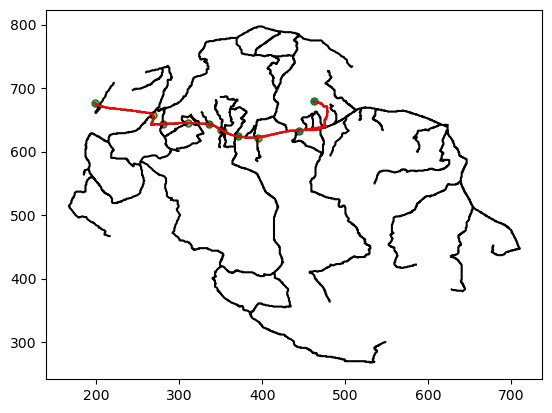

In [70]:
# Решение
G = nx.DiGraph()
A = [(i, j, k) for i in ds['id_road'].values \
    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(A)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
d = 45
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
edges = [(a,b) for a,b in zip(shortest_path_s_v, shortest_path_s_v[1:])]
a = shortest_path_s_v
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(a)-2):   
    plt.plot(ds[ds['id_road'] == a[i]]['time_rasstoyania_j'].values[0][str(a[i+1])], ds[ds['id_road'] == a[i]]['time_rasstoyania_i'].values[0][str(a[i+1])], color='red')
    plt.plot(ds[ds['id_road'] == a[i+1]]['time_rasstoyania_j'].values[0][str(a[i])], ds[ds['id_road'] == a[i+1]]['time_rasstoyania_i'].values[0][str(a[i])], color='red')
    plt.scatter(ds[ds['id_road'] == a[i]]['J'].values[0][0], ds[ds['id_road'] == a[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[-1]]['J'].values[0][0], ds[ds['id_road'] == a[-1]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[0]]['J'].values[0][0], ds[ds['id_road'] == a[0]]['I'].values[0][0], s=25, edgecolors='green')
if len(ds[ds['id_road'] == a[0]]['rasstoyania_j'].values[0][str(a[1])]):
    plt.plot(ds[ds['id_road'] == a[0]]['rasstoyania_j'].values[0][str(a[1])], ds[ds['id_road'] == a[0]]['rasstoyania_i'].values[0][str(a[1])], color='red')
else:
    plt.plot(ds[ds['id_road'] == a[1]]['rasstoyania_j'].values[0][str(a[0])], ds[ds['id_road'] == a[1]]['rasstoyania_i'].values[0][str(a[0])], color='red')
plt.plot(ds[ds['id_road'] == a[-2]]['rasstoyania_j'].values[0][str(a[-1])], ds[ds['id_road'] == a[-2]]['rasstoyania_i'].values[0][str(a[-1])], color='red')

In [13]:
shortest_path_s_v

[45, 9, 8, 7, 6, 20, 5, 4, 3, 2, 16, 1]

In [50]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,...,coordinate,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
0,1,"[676, 676, 676, 674, 675, 676, 676, 676, 676, ...","[196, 197, 198, 198, 198, 198, 200, 199, 198, ...",110,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",196,676,266,657,...,"[(676, 196), (676, 197), (676, 198), (674, 198...","[2, 14, 15, 16, 32]","[110, 49, 0, 109, 244]","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': 110, '14': 19, '15': 0, '16': 109, '32':..."
1,2,"[657, 657, 657, 655, 656, 657, 657, 657, 657, ...","[266, 267, 268, 268, 268, 268, 270, 269, 268, ...",44,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",266,657,277,644,...,"[(657, 266), (657, 267), (657, 268), (655, 268...","[1, 3, 16, 32, 33, 73]","[110, 44, 0, 134, 44, 44]","{'1': [676, 675, 675, 674, 674, 674, 673, 673,...","{'1': [198, 198, 199, 199, 200, 201, 202, 203,...","{'1': [], '3': [657, 656, 656, 655, 655, 654, ...","{'1': [], '3': [268, 268, 269, 269, 269, 269, ...","{'1': [], '3': [644, 644, 644, 644, 644, 644, ...","{'1': [], '3': [280, 279, 280, 281, 282, 283, ...","{'1': 0, '3': 55, '16': 0, '32': 0, '33': 55, ..."
2,3,"[644, 644, 644, 642, 643, 644, 644, 644, 644, ...","[278, 279, 280, 280, 280, 280, 282, 281, 280, ...",35,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",278,644,307,645,...,"[(644, 278), (644, 279), (644, 280), (642, 280...","[2, 4, 33, 34, 73, 95]","[44, 35, 0, 82, 0, 78]","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': [], '4': [644, 644, 644, 644, 644, 644, ...","{'2': [], '4': [280, 279, 280, 281, 282, 283, ...","{'2': [], '4': [645, 645, 645, 645, 645, 645, ...","{'2': [], '4': [310, 310, 311, 311, 312, 312, ...","{'2': 0, '4': 46, '33': 0, '34': 42, '73': 0, ..."
3,4,"[645, 645, 645, 643, 644, 645, 645, 645, 645, ...","[308, 309, 310, 310, 310, 310, 312, 311, 310, ...",44,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",308,645,334,643,...,"[(645, 308), (645, 309), (645, 310), (643, 310...","[3, 5, 34, 35, 95, 96]","[35, 44, 47, 61, 43, 0]","{'3': [644, 644, 644, 644, 644, 644, 644, 644,...","{'3': [280, 279, 280, 281, 282, 283, 284, 285,...","{'3': [], '5': [645, 645, 645, 645, 645, 645, ...","{'3': [], '5': [310, 310, 311, 311, 312, 312, ...","{'3': [], '5': [643, 643, 643, 643, 643, 642, ...","{'3': [], '5': [336, 337, 337, 338, 338, 339, ...","{'3': 0, '5': 55, '34': 0, '35': 51, '95': 0, ..."
4,5,"[643, 643, 643, 641, 642, 643, 643, 643, 643, ...","[334, 335, 336, 336, 336, 336, 338, 337, 336, ...",33,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",334,643,350,633,...,"[(643, 334), (643, 335), (643, 336), (641, 336...","[4, 6, 20, 21, 35, 36, 37]","[44, 33, 30, 33, 17, 97, 145]","{'4': [645, 645, 645, 645, 645, 645, 645, 645,...","{'4': [310, 310, 311, 311, 312, 312, 313, 313,...","{'4': [], '6': [643, 643, 643, 643, 643, 642, ...","{'4': [], '6': [336, 337, 337, 338, 338, 339, ...","{'4': [], '6': [633, 632, 632, 631, 631, 630, ...","{'4': [], '6': [352, 353, 354, 354, 355, 355, ...","{'4': 0, '6': 38, '20': 30, '21': 39, '35': 0,..."


In [14]:
edges

[(45, 9),
 (9, 8),
 (8, 7),
 (7, 6),
 (6, 20),
 (20, 5),
 (5, 4),
 (4, 3),
 (3, 2),
 (2, 16),
 (16, 1)]

In [15]:
Sum = 0
for i, j in edges:
    for k in A:
        if k[0] == i and k[1] == j:
            Sum += k[2]
            break

In [16]:
Sum

490